<a href="https://colab.research.google.com/github/KilovoIt/Unit-_1-revised/blob/main/Revised_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

In [3]:
df

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [4]:
sample20 = df.sample(20, random_state=42)
sample200 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [5]:
from termcolor import colored as c
mean20 = sample20['ConvertedSalary'].mean()
mean200 = sample200['ConvertedSalary'].mean()
print(c(mean20, 'red'), c(mean200, 'blue'))

55752.2 68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust 200 sample more merely because it's closer to the population size, therefore less spread out, there is a higher chance of getting the sample mean closer to the population mean. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Sampling error is the distance between the true mean of the population and the sample mean. To find it out, we need to know both. Knowing just one will not tell anything.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We could say that we are trying to capture the population mean with some certainty. If our mean is just one number, there is a great possiblilty we miss. However, if we allow the mean to fluctuate in some interval, it can include the true population mean.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [6]:
import scipy.stats as stats
import numpy as np

def confidence_interval(confidence, data):
    mean = data.mean()
    n = len(data)
    stderr_mean = stats.sem(data)
    interval = stderr_mean * stats.t.ppf((1+confidence) / 2, n-1)
    return(mean-interval, mean, mean+interval, interval)

print(confidence_interval(.95, sample20['ConvertedSalary']))

print(confidence_interval(.95, sample200['ConvertedSalary']))





(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)
(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [7]:
print(c(mean20,'green'), round(confidence_interval(.95, sample20['ConvertedSalary'])[3], 2))
print(c(mean200,'green'), round(confidence_interval(.95, sample200['ConvertedSalary'])[3], 2))

55752.2 19947.1
68551.255 7958.2


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

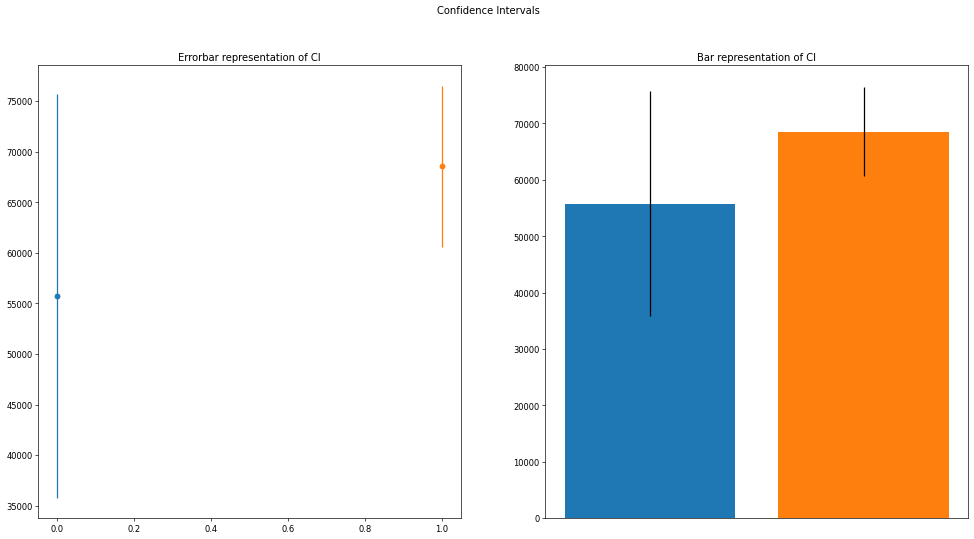

In [8]:
import matplotlib.pyplot as plt


CI20 = confidence_interval(.95, sample20['ConvertedSalary'])
CI200 = confidence_interval(.95, sample200['ConvertedSalary'])

fig = plt.figure(figsize=(20, 10), dpi=60)
ax = plt.subplot(121)
ax1 = plt.subplot(122)

ax.errorbar(0, CI20[1], yerr=CI20[3], fmt='o')
ax.errorbar(1, CI200[1], yerr=CI200[3], fmt='o')
ax.set_title('Errorbar representation of CI')

ax1.bar(0, CI20[1], yerr=CI20[3])
ax1.bar(1, CI200[1], yerr=CI200[3])
ax1.set_title("Bar representation of CI")
ax1.axes.xaxis.set_visible(False)

plt.suptitle("Confidence Intervals")

plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [9]:
confidence_interval(.95, df['ConvertedSalary'])

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

ok, let's pretend the whole dataset here is not an entire population, but rather just a *sample*. In this case, using everything we have give the result of unknown accuracy (we don't know where the true population mean is), but it's quite precise - MOE is not bad at all, the distribution is very tightly packed around the mean. 

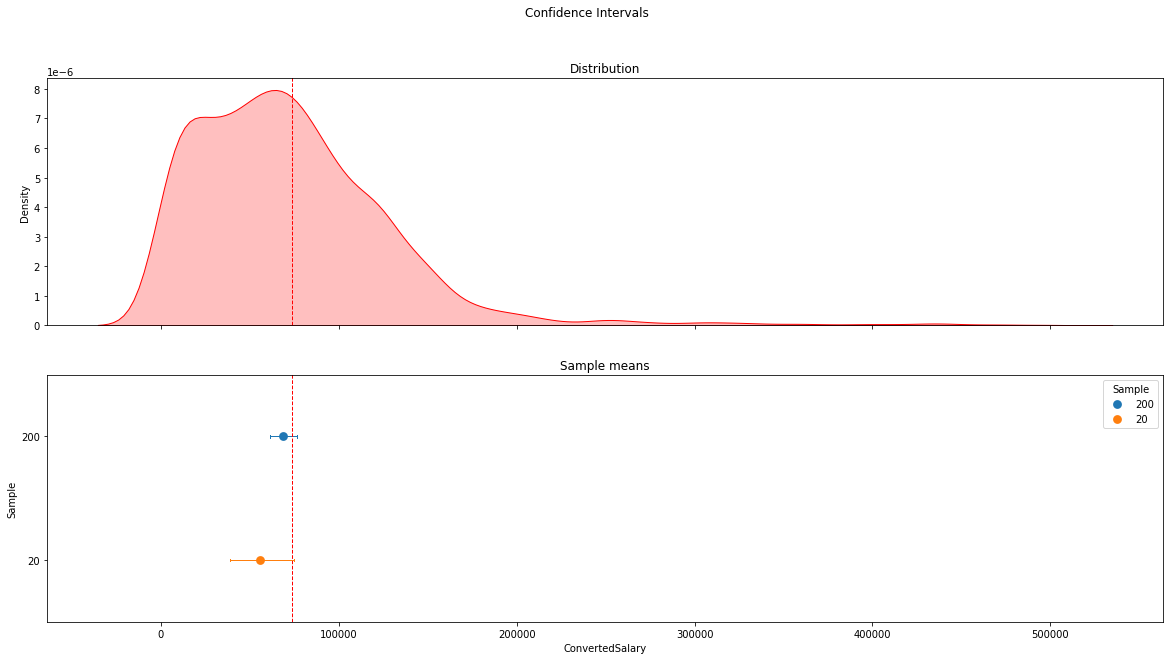

In [10]:
import seaborn as sns


fig1, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='red')
axs[1].axvline(df['ConvertedSalary'].mean(), 0, 60, ls='--', lw=1, color='red')
axs[0].axvline(df['ConvertedSalary'].mean(), 0, 60, ls='--', lw=1, color='red')


data = pd.DataFrame(sample200['ConvertedSalary'])
data['Sample'] = ['200'] * len(sample200)
data2 = data.append(pd.DataFrame(sample20['ConvertedSalary']))
data2['Sample'] = data2['Sample'].fillna('20')
sns.pointplot(x=data2.ConvertedSalary, y=data2.Sample, ax=axs[1], errwidth=1, capsize=0.02, join=False, hue=data2['Sample'])
plt.suptitle("Confidence Intervals")
axs[0].set_title('Distribution')
axs[1].set_title('Sample means')

plt.show()


In [11]:
data2

,ConvertedSalary,Sample
367,74500.0,200
2759,60000.0,200
1330,86120.0,200
2750,60000.0,200
521,25047.0,200
...,...,...
239,64417.0,20
2261,9600.0,20
2233,40196.0,20
1688,9706.0,20


**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

"Precision" is how widespread is our confidence interval. The smaller is the MOE, the better. "Accuracy", on the other hand, is basically the sampling error, how far away is the sample mean from the true population mean. 

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

In 95% of the cases, that confidence interval will contain true population mean. Somewhere within it. 

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [12]:
CI = confidence_interval(.95, df['ConvertedSalary'])
CI

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

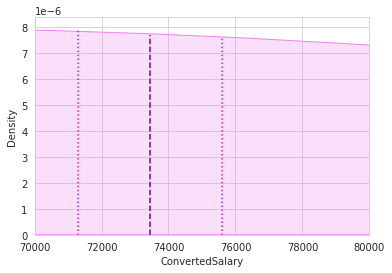

In [13]:
sns.set_style('whitegrid')
sns.kdeplot(df['ConvertedSalary'], fill=True, color='violet')
plt.xlim([70000, 80000])
plt.plot([CI[1], CI[1]], [0, 7.7*10**(-6)], ls='--', color='purple')
plt.plot([CI[0], CI[0]], [0, 7.9*10**(-6)], ls=':', color='magenta')
plt.plot([CI[2], CI[2]], [0, 7.6*10**(-6)], ls=':', color='magenta')

plt.show()

In [14]:
from scipy import stats
print('barely outside, p-val=', stats.ttest_1samp(df.ConvertedSalary, popmean=75607)[1])
print('barely inside, p-val=', stats.ttest_1samp(df.ConvertedSalary, popmean=75606)[1])

barely outside, p-val= 0.04999771873861671
barely inside, p-val= 0.05010411699639362


Confidence intervals and T-tests are connected together. When we are constructing a 95% confidence interval, we are hoping to catch popmean 95% of the time. When we run a 1samp t-test with alpha = .05, we are doing the opposite: trying to see the probability that the popmean lies within the given span.

In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
parties  = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")
parties.dropna(inplace=True)
parties.replace('y', 1, inplace=True)
parties.replace('n', 0, inplace=True)
parties.head()

--2021-08-19 10:19:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.01s   

2021-08-19 10:19:17 (1.78 MB/s) - ‘house-votes-84.data’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [16]:

rep = parties[parties.party == 'republican']
headers = list(rep.columns)
cintervals = []
for k in headers[1:]:
    cintervals.append(confidence_interval(.95, rep[k]))

In [17]:
# from google.colab import files

# rep.to_csv('republicans.csv')
# files.download('republicans.csv')

In [18]:
# dropping unnecessary columns
rep.drop(['party'], axis=1, inplace=True)
rep

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
28,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
30,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
33,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
35,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1
416,1,1,0,1,1,1,0,0,0,1,0,0,1,1,0,1
420,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1
427,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1


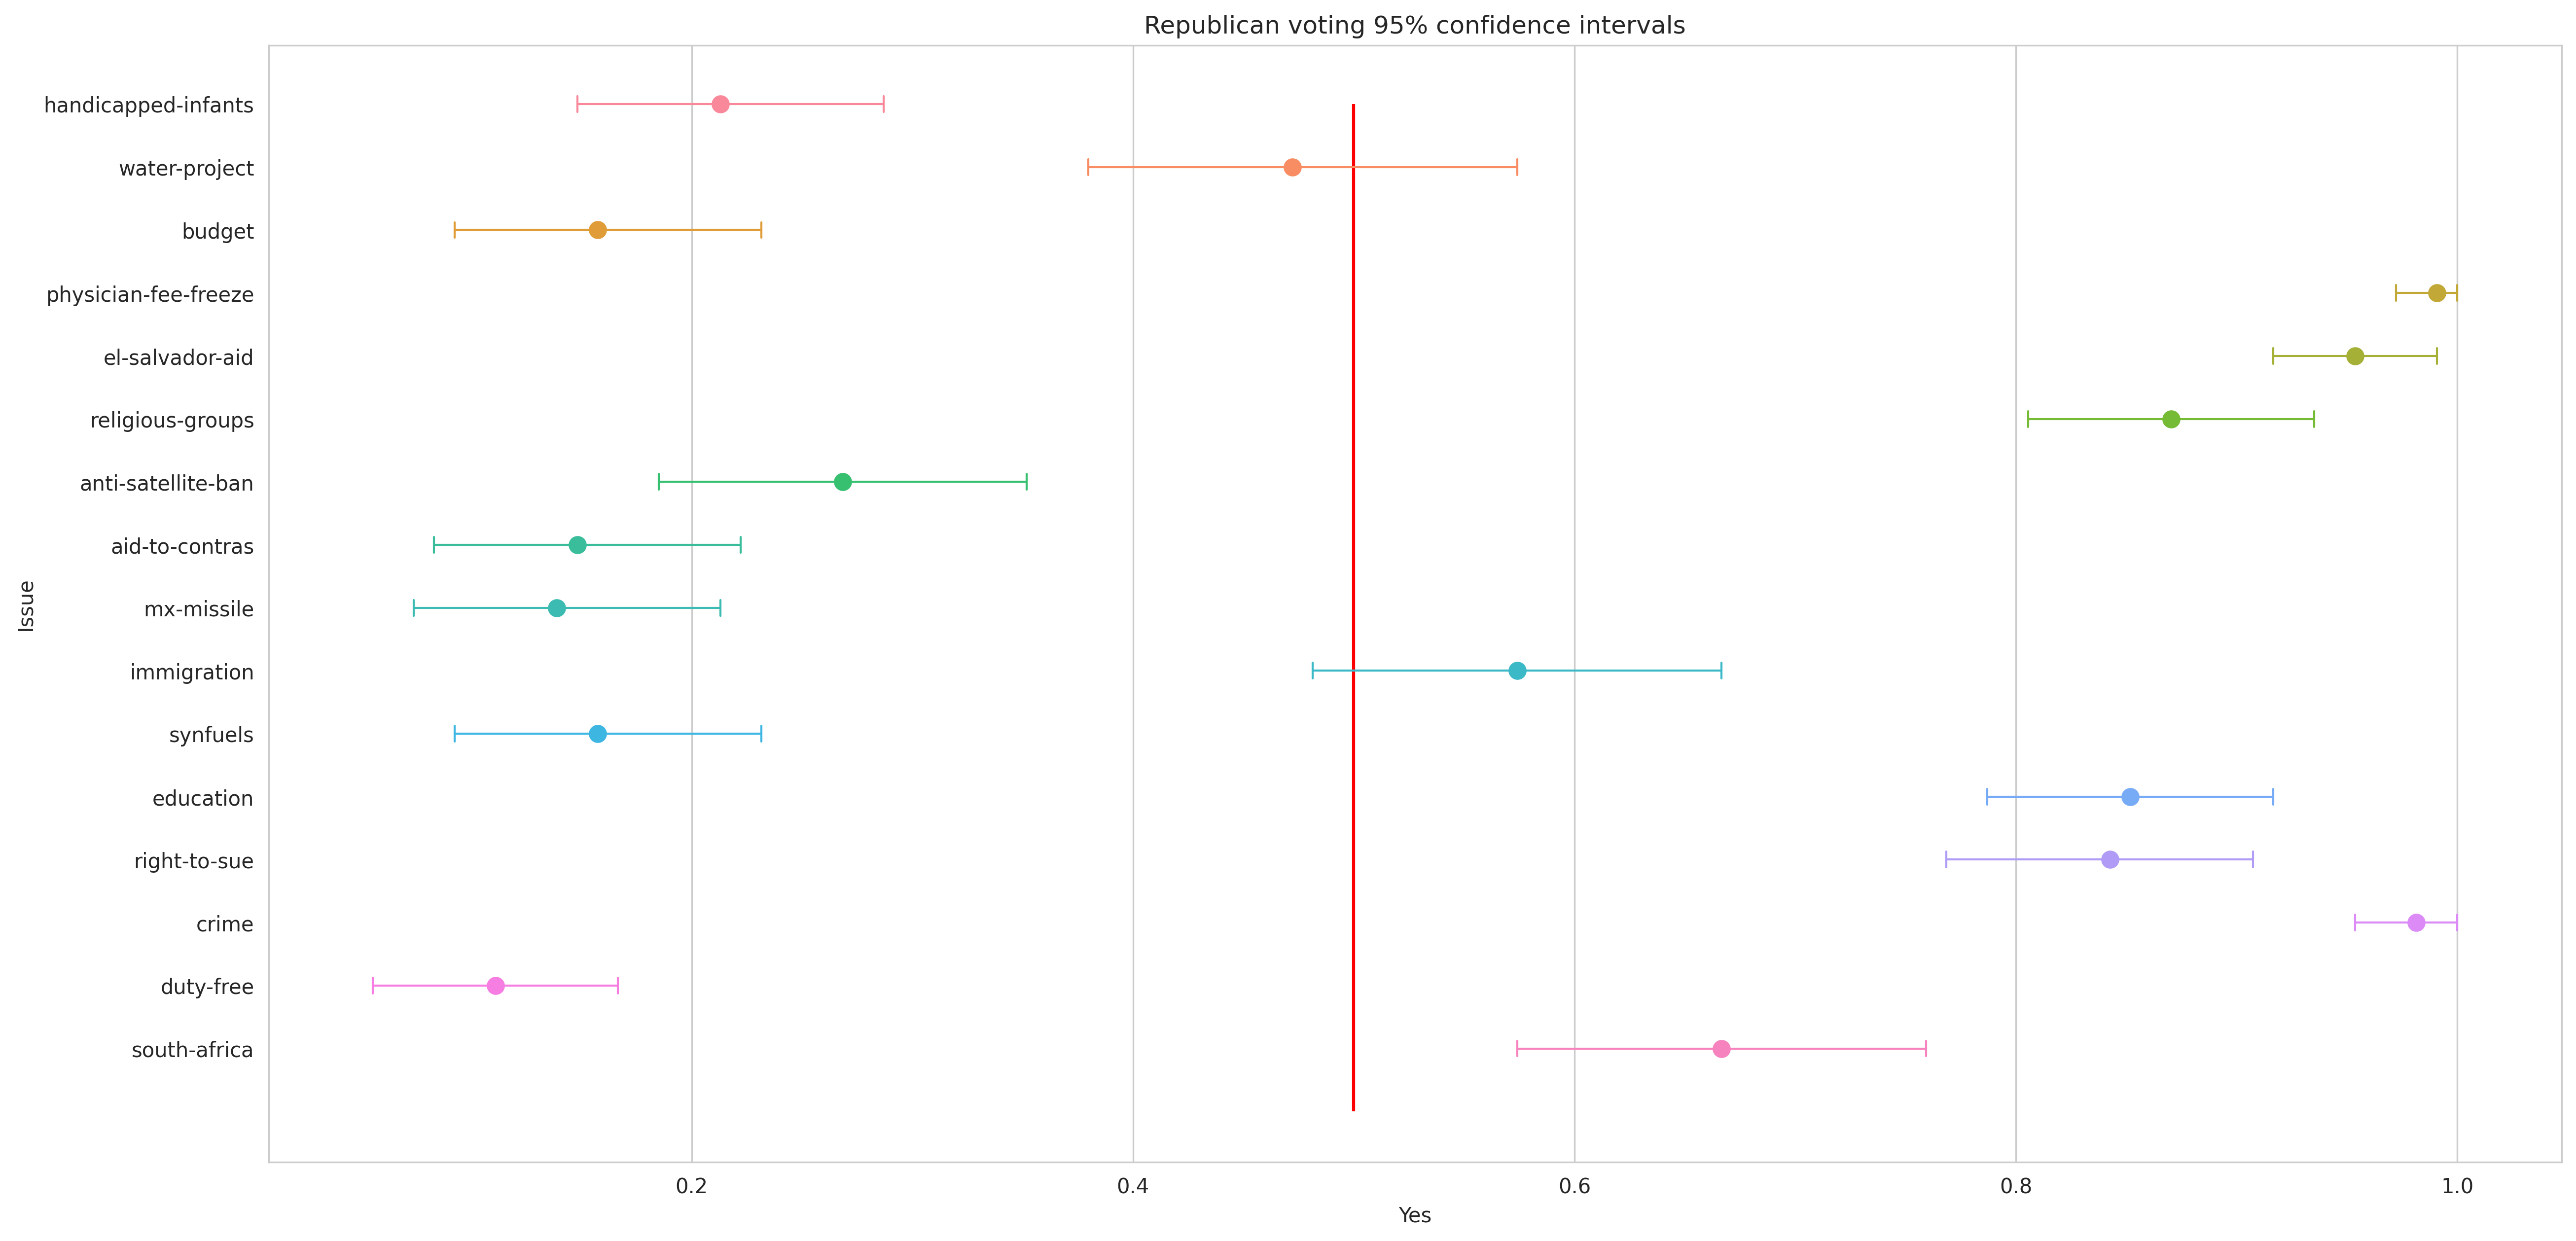

In [19]:

empty = pd.DataFrame()

for i in range(1, 109):
    k = pd.DataFrame(rep.iloc[i-1:i].T)
    k.reset_index(inplace=True)
    k.rename(columns={'index': 'Issue', rep.iloc[i-1:i].index[0]: 'Yes'}, inplace=True)
    empty = empty.append(k)

fig_ci = plt.figure(figsize=(20, 10), dpi=300)
ax3 = plt.subplot(111)
sns.pointplot(x=empty.Yes, y=empty.Issue, errwidth=1, capsize=0.25, join=False, hue=empty.Issue, ax=ax3)
ax3.vlines(0.5, 0, 16, color='r')
plt.legend([],[], frameon=False)
plt.title('Republican voting 95% confidence intervals')
plt.show()



In [24]:
# from google.colab import files

# rep.to_csv('empty.csv')
# files.download('empty.csv')
empty

,Issue,Yes
0,handicapped-infants,0
1,water-project,1
2,budget,0
3,physician-fee-freeze,1
4,el-salvador-aid,1
...,...,...
11,education,1
12,right-to-sue,1
13,crime,1
14,duty-free,0


In [21]:

# constructing a table that will show proportion of  'yes' out of total
reworked_table = pd.DataFrame(index=rep.columns)

reworked_table['proportion'] = rep.sum(axis=0)/rep.count(axis=0)
reworked_table['n'] = rep.count(axis=0)
reworked_table['se'] = np.sqrt(reworked_table['proportion']*(1-reworked_table['proportion'])/reworked_table['n'])
reworked_table['upper'] = reworked_table['proportion'] + 1.960*reworked_table['se']
reworked_table['lower'] = reworked_table['proportion'] - 1.960*reworked_table['se']

reworked_table = reworked_table.reset_index()

In [22]:
reworked_table

,index,proportion,n,se,upper,lower
0,handicapped-infants,0.212963,108,0.039395,0.290177,0.135749
1,water-project,0.472222,108,0.048038,0.566377,0.378067
2,budget,0.157407,108,0.035044,0.226093,0.088722
3,physician-fee-freeze,0.990741,108,0.009216,1.008805,0.972677
4,el-salvador-aid,0.953704,108,0.020219,0.993334,0.914074
5,religious-groups,0.870370,108,0.032322,0.933721,0.807020
6,anti-satellite-ban,0.268519,108,0.042646,0.352104,0.184933
7,aid-to-contras,0.148148,108,0.034184,0.215148,0.081148
8,mx-missile,0.138889,108,0.033278,0.204113,0.073665
9,immigration,0.574074,108,0.047582,0.667334,0.480814


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


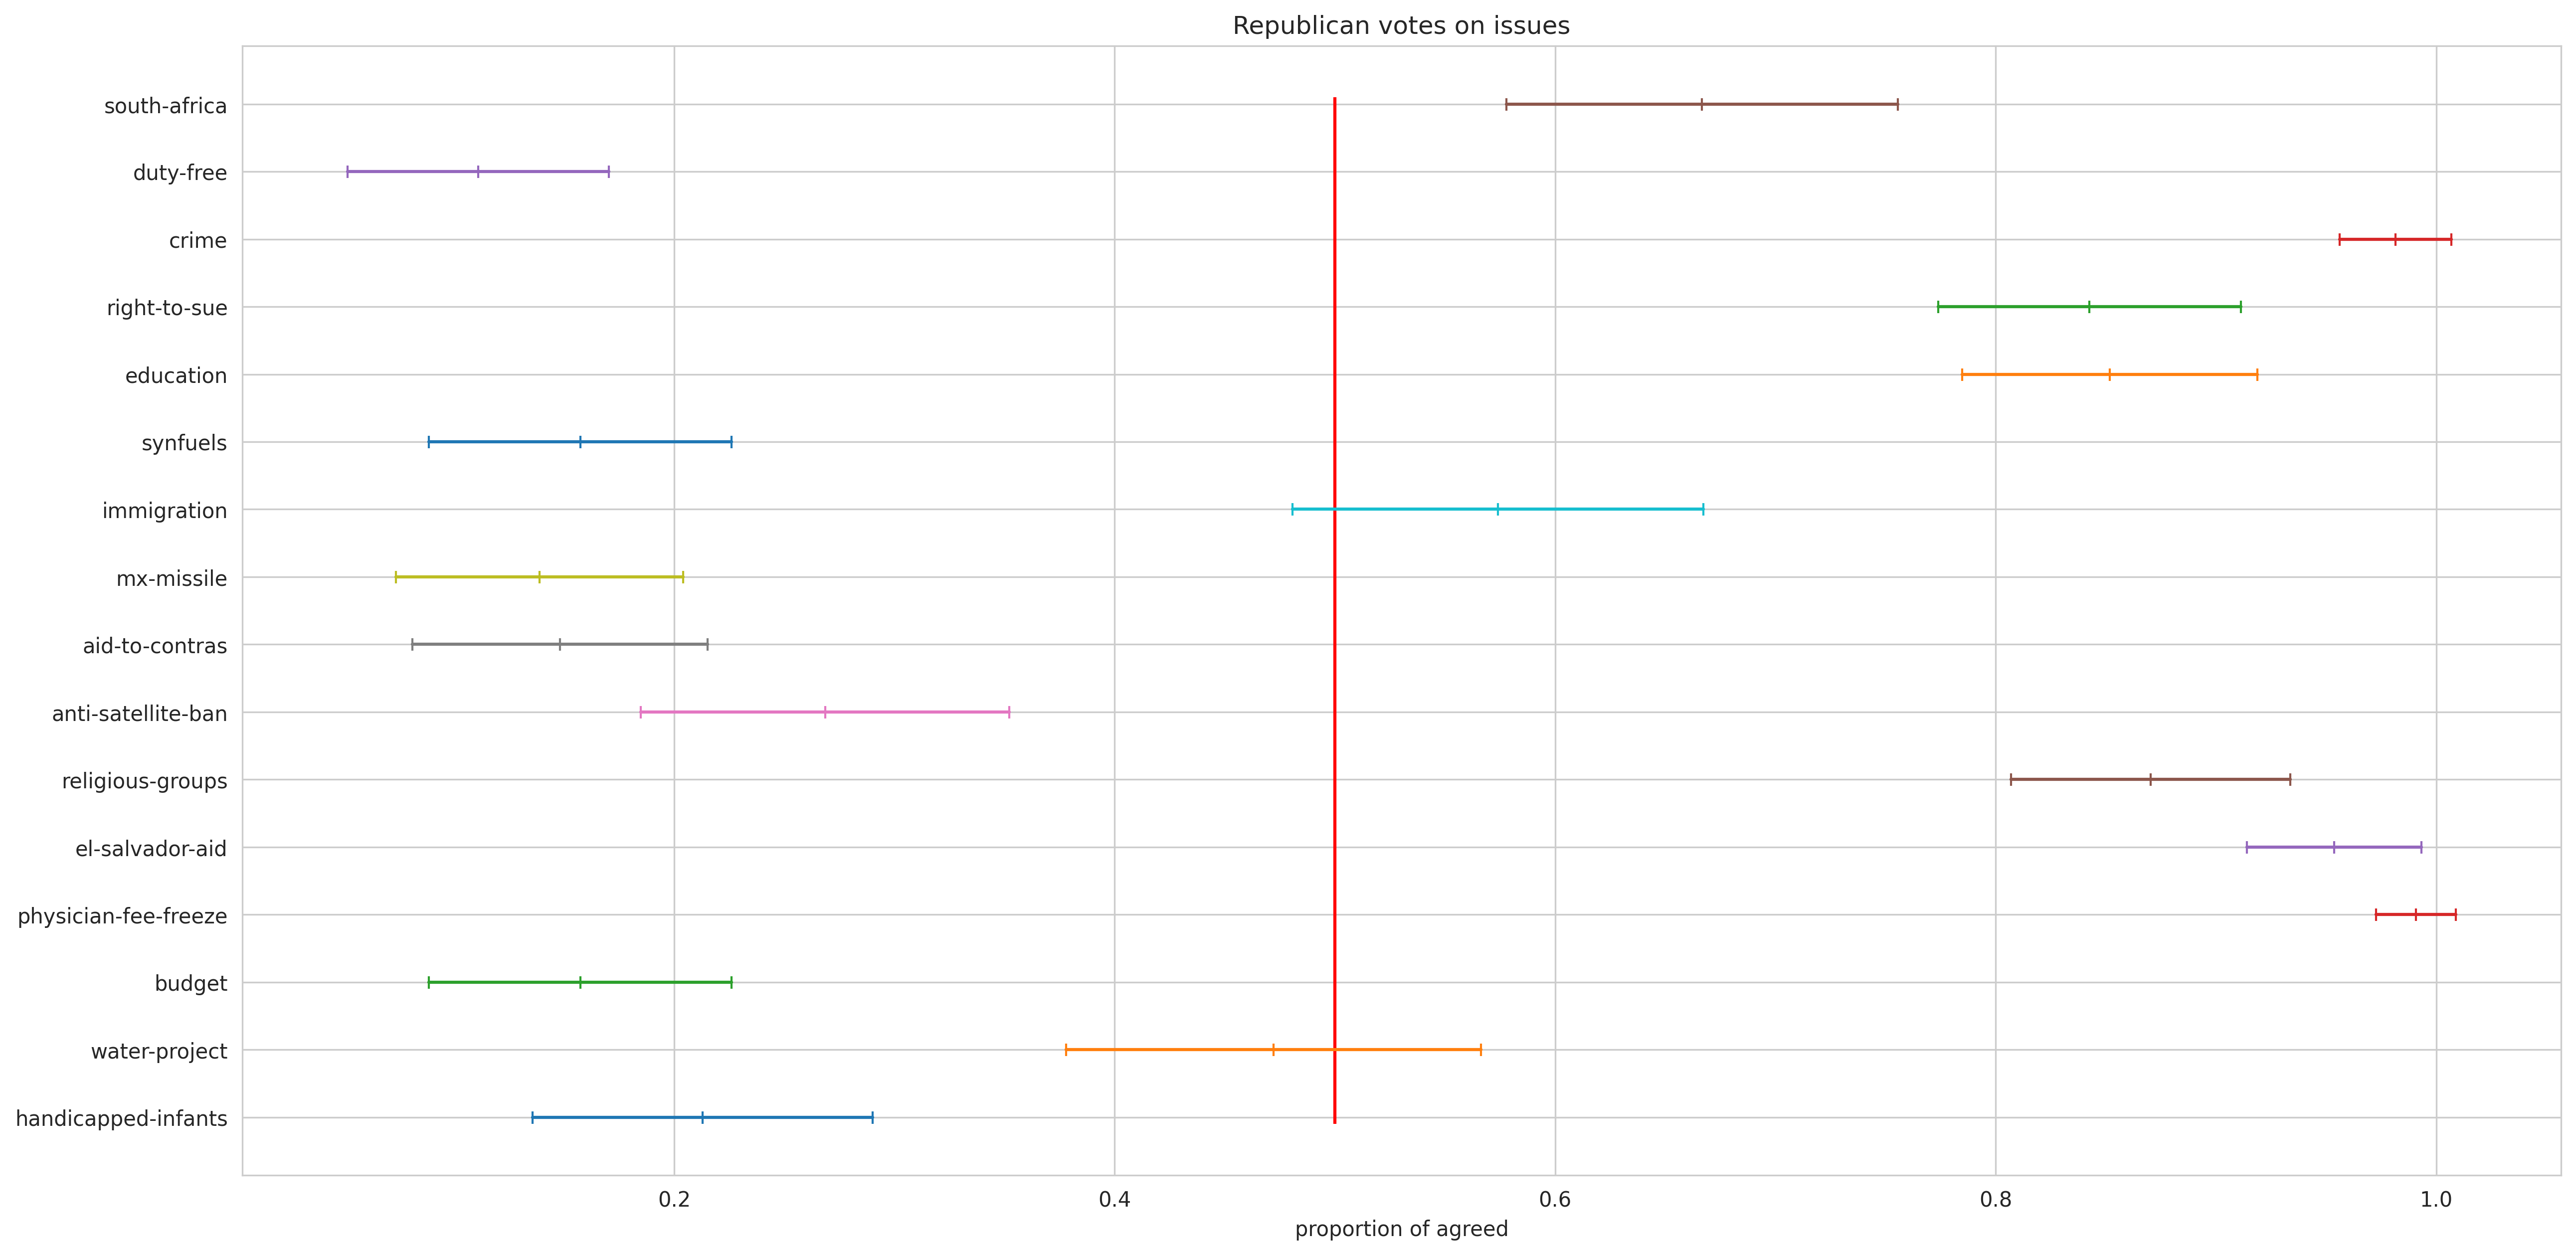

In [23]:
fig2 = plt.figure(figsize=(20, 10), dpi=300)
plt.title('Republican votes on issues')
ax2 = plt.subplot(111)
ax2.plot([reworked_table.lower, reworked_table.proportion, reworked_table.upper], [reworked_table.index, reworked_table.index, reworked_table.index], marker='|')
plt.yticks(range(len(reworked_table)),list(reworked_table['index']))

# red line represents 50% of the republicans voted. I assumed that if more than half republicans
#voted as 'yes' on the issue, we can infer that the republican population has voted 'yes' mostly.
ax2.set_xlabel('proportion of agreed')
ax2.vlines(0.5, -.1, 15.1, color='r')
plt.show()